In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
games = pd.read_csv('../data/games.csv')
games_details = pd.read_csv('../data/games_details.csv', low_memory=False)
players = pd.read_csv('../data/players.csv')
teams = pd.read_csv('../data/teams.csv')
ranking = pd.read_csv('../data/ranking.csv')

TOP 10 PLAYERS WITH MOST GAMES PLAYED

In [13]:
def plot_top(df, column, label_col=None, max_plot=5):
    top_df = df.sort_values(column, ascending=False).head(max_plot)
    
    height = top_df[column]
    x = top_df.index if label_col == None else top_df[label_col]
    
    gold, silver, bronze, other = ('#FFA400', '#bdc3c7', '#cd7f32', '#3498db')
    colors = [gold if i == 0 else silver if i == 1 else bronze if i == 2 else other for i in range(0, len(top_df))]
    
    fig, ax = plt.subplots(figsize=(18, 7))
    ax.bar(x, height, color=colors)
    plt.xticks(x, x, rotation=60)
    plt.xlabel(label_col)
    plt.ylabel(column)
    plt.title(f'Top {max_plot} {column}')
    plt.show()

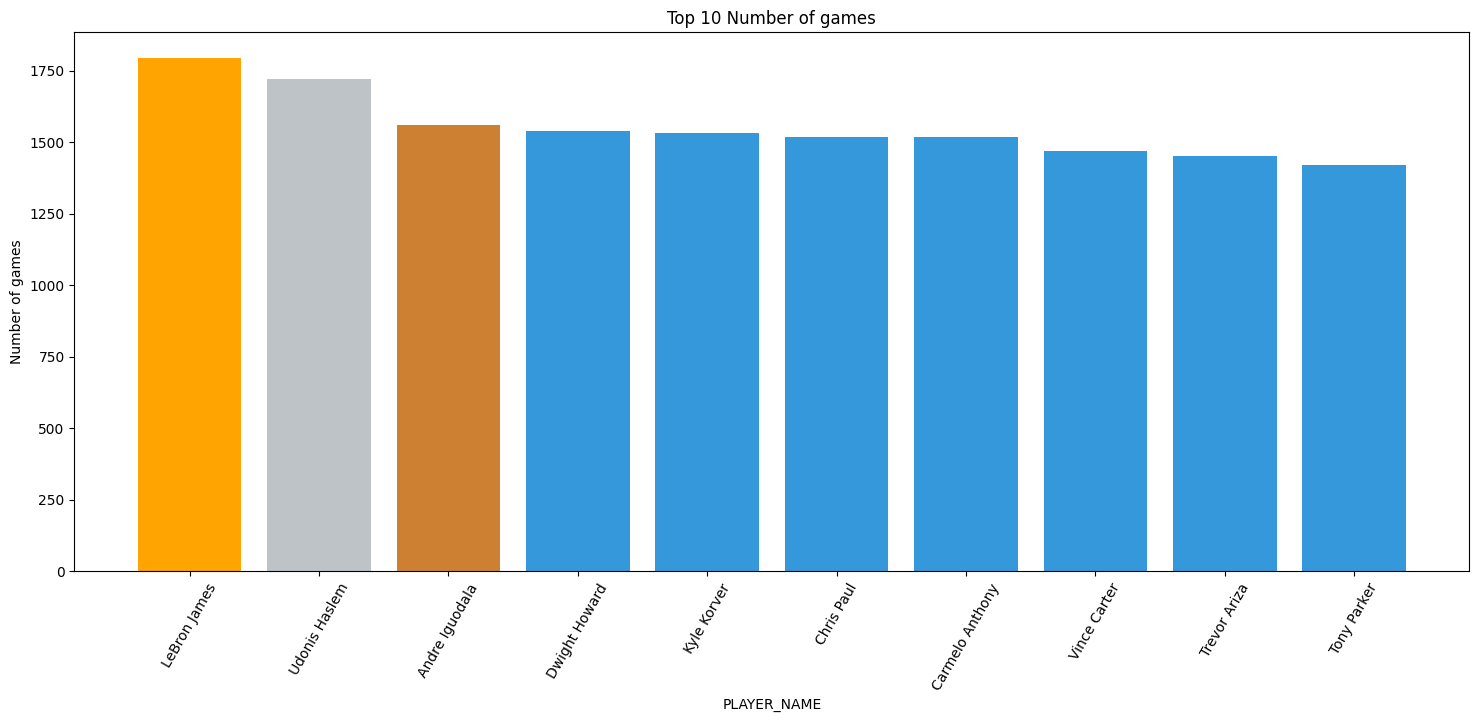

In [14]:
players_name = games_details['PLAYER_NAME']
val_cnt = players_name.value_counts().to_frame().reset_index()
val_cnt.columns = ['PLAYER_NAME', 'Number of games']
plot_top(val_cnt, column='Number of games', label_col='PLAYER_NAME', max_plot=10)

IS MOST GAMES PLAYED MEANS MOST TIME PLAYED?

In [15]:
def convert_min(x):
    if pd.isna(x):
        return 0
    
    x_str = str(x).strip()
    
    try:
        if ':' not in x_str:
            minutes = float(x_str)
            return int(minutes * 60)
        
        parts = x_str.split(':')
        if len(parts) == 1:
            return int(float(parts[0]))
        elif len(parts) == 2:
            minutes = int(float(parts[0]))
            seconds = int(float(parts[1]))
            return minutes * 60 + seconds
        else:
            return 0  
    except ValueError:
        print(f"Failed to convert: {x_str}")
        return 0

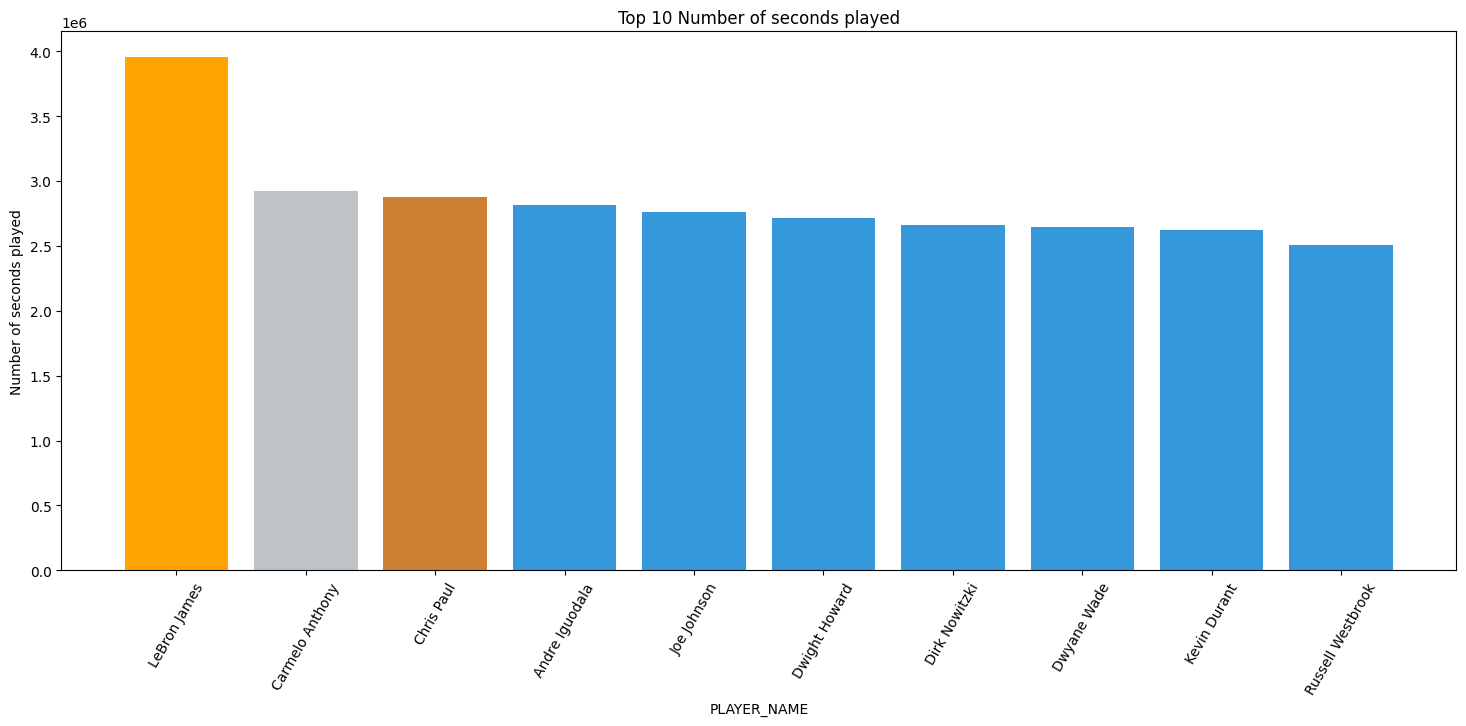

In [16]:
df_tmp = games_details[['PLAYER_NAME', 'MIN']]
df_tmp.loc[:,'MIN'] = df_tmp['MIN'].apply(convert_min)
agg = df_tmp.groupby('PLAYER_NAME').agg('sum').reset_index()
agg.columns = ['PLAYER_NAME', 'Number of seconds played']
plot_top(agg, column='Number of seconds played', label_col='PLAYER_NAME', max_plot=10)

WHICH TEAM HAS THE MOST WINNING SINCE 2004 SEASON?

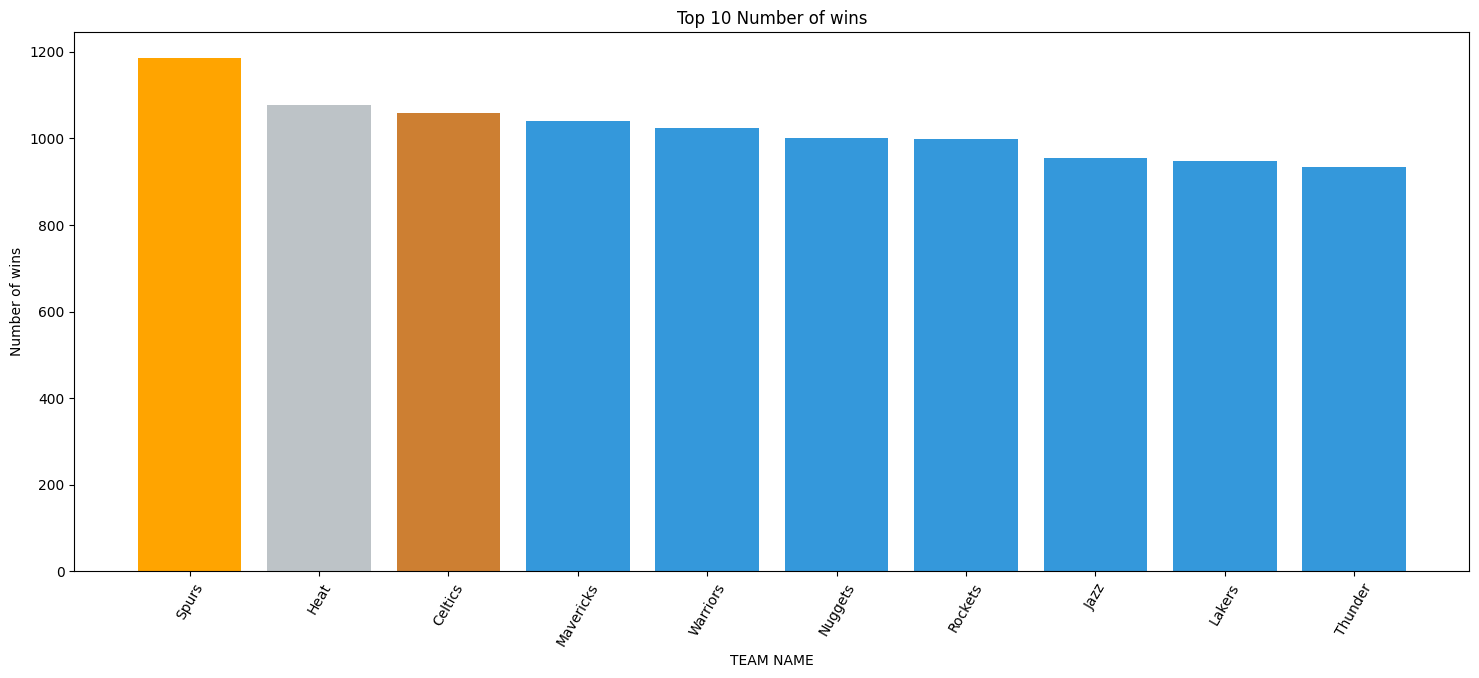

In [17]:
winning_teams = np.where(games['HOME_TEAM_WINS'] == 1, games['HOME_TEAM_ID'], games['VISITOR_TEAM_ID'])
winning_teams = pd.DataFrame(winning_teams, columns=['TEAM_ID'])
winning_teams = winning_teams.merge(teams[['TEAM_ID', 'NICKNAME']], on='TEAM_ID')['NICKNAME'].value_counts().to_frame().reset_index()
winning_teams.columns = ['TEAM NAME', 'Number of wins']
plot_top(winning_teams, column='Number of wins', label_col='TEAM NAME', max_plot=10)

TOP 10 PLAYERS WHO SCORED MOST POINTS

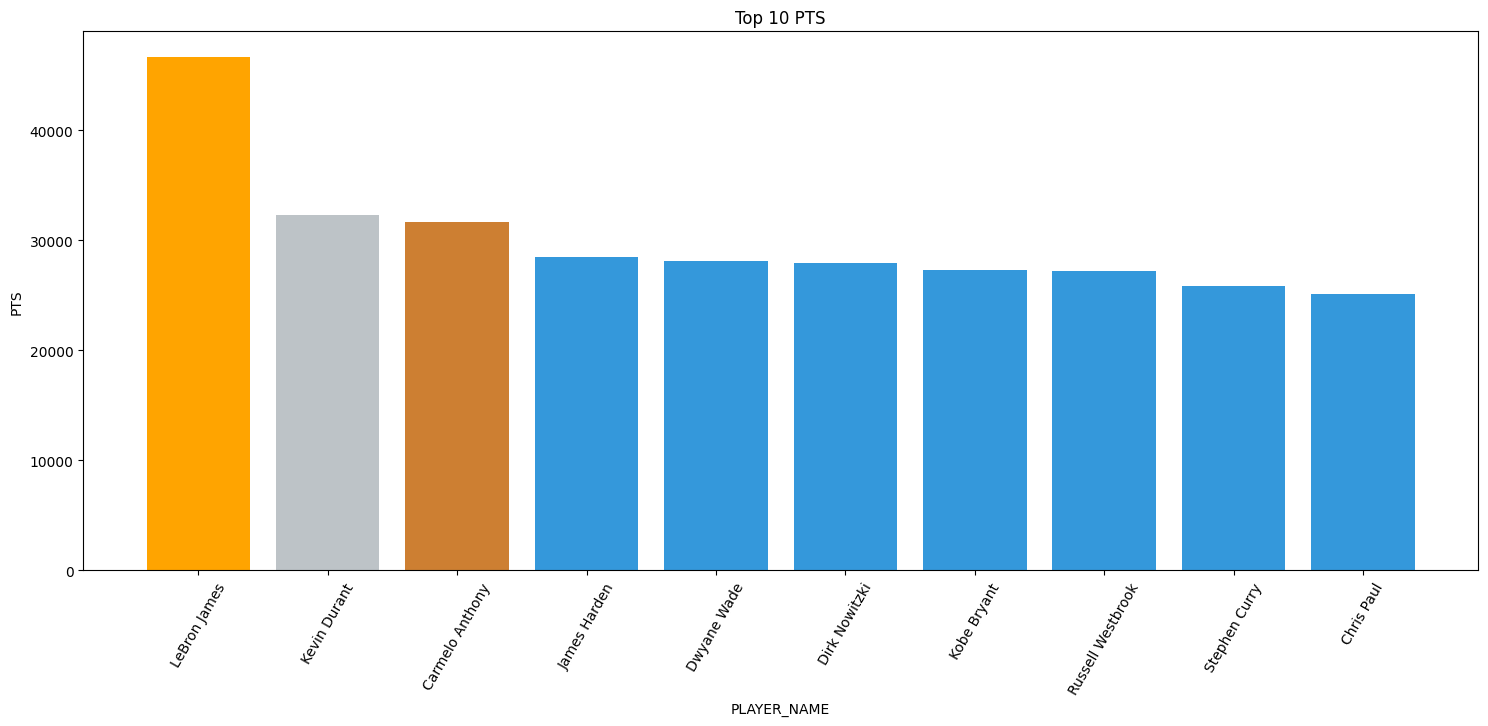

In [18]:
points_by_player = games_details.groupby('PLAYER_NAME')['PTS'].sum().reset_index()
points_by_player = points_by_player.sort_values('PTS', ascending=False)
plot_top(points_by_player, column='PTS', label_col='PLAYER_NAME', max_plot=10)

TOP 10 PLAYERS WHO HAS BEST 3 POINT PERCENTAGE

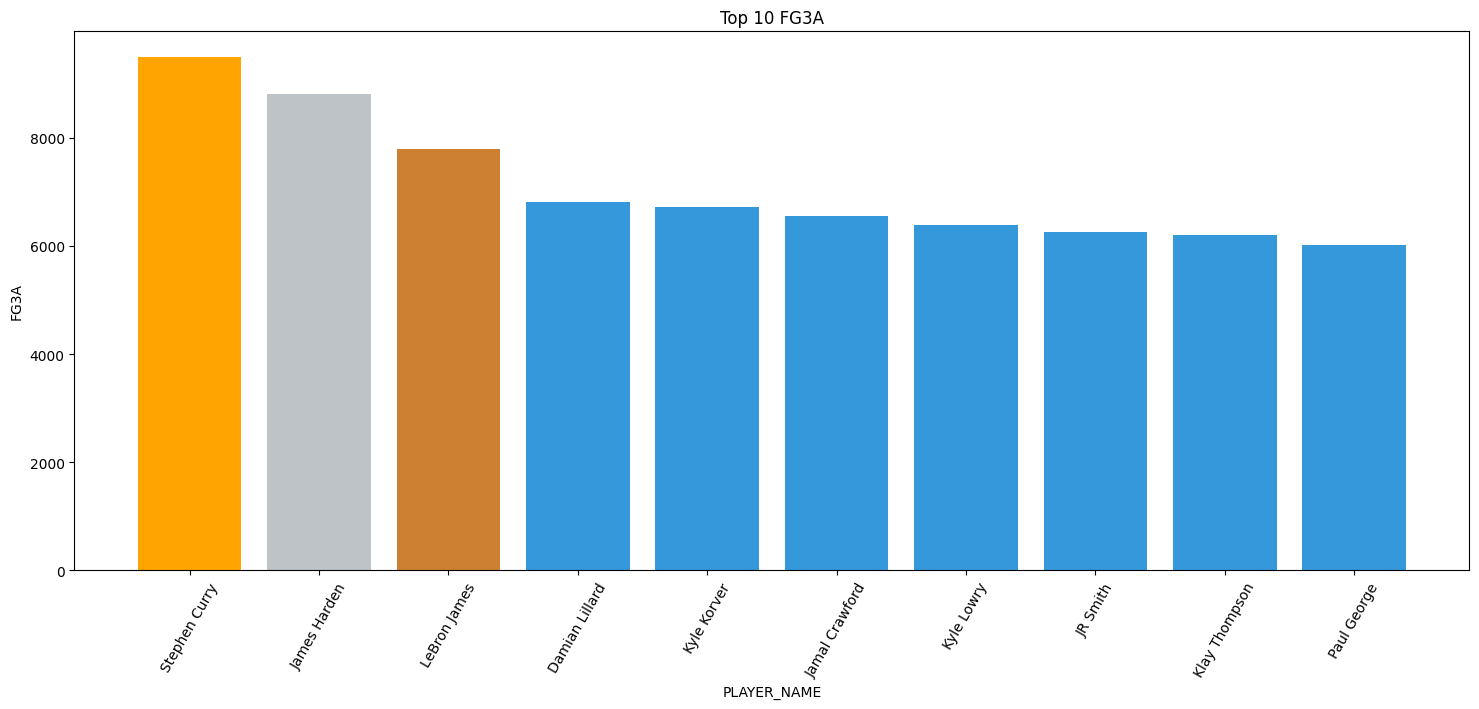

In [19]:
points_by_player3 = games_details.groupby('PLAYER_NAME')['FG3A'].sum().reset_index()
points_by_player3 = points_by_player3.sort_values('FG3A', ascending=False)
plot_top(points_by_player3, column='FG3A', label_col='PLAYER_NAME', max_plot=10)

SEASON GAMES / 2011-2012 lockout

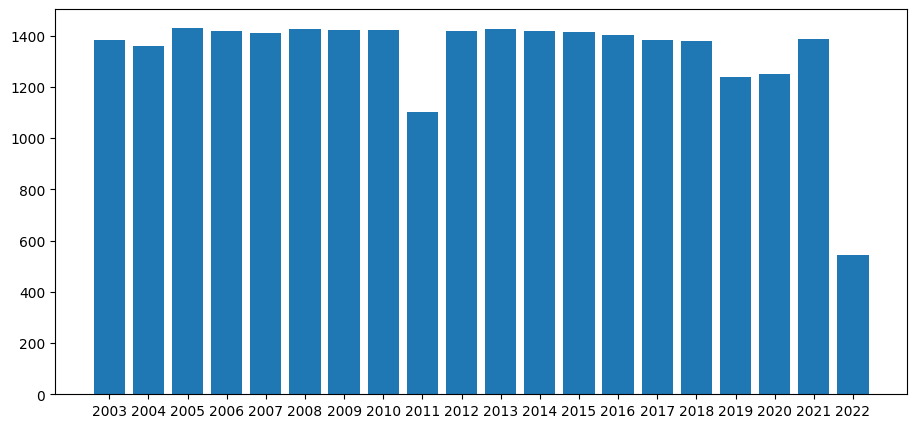

In [20]:
fig, ax = plt.subplots(figsize=(11,5))

values = games['SEASON'].value_counts().sort_index()
values.index = values.index.astype(str)
ax.bar(values.index, values.values)

plt.show()